Test Loss: 1.0619872319698334
Test Accuracy: 0.7550099790096283
Test Time: 1.1363235378265382
Train Loss: 0.15861570248754736
Train Accuracy: 0.9462347951344431
Train Time: 91.39565622806549

Test Loss: 0.7673343658447266
Test Accuracy: 0.7878399789333344
Test Time: 4.563860154151916
Train Loss: 0.26182606127208496
Train Accuracy: 0.909851152368758
Train Time: 99.99527773857116

Test Loss: 0.7005088746547699
Test Accuracy: 0.7640999853610992
Test Time: 1.335694932937622
Train Loss: 0.5335847972964965
Train Accuracy: 0.810283290653009
Train Time: 92.72327704429627

Test Loss: 0.6616846680641174
Test Accuracy: 0.7807799875736237
Test Time: 4.605147361755371
Train Loss: 0.5239413136165594
Train Accuracy: 0.8186199583866838
Train Time: 101.39042589664459



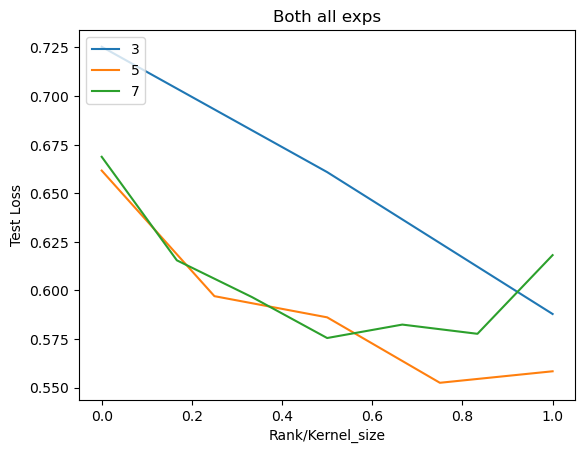

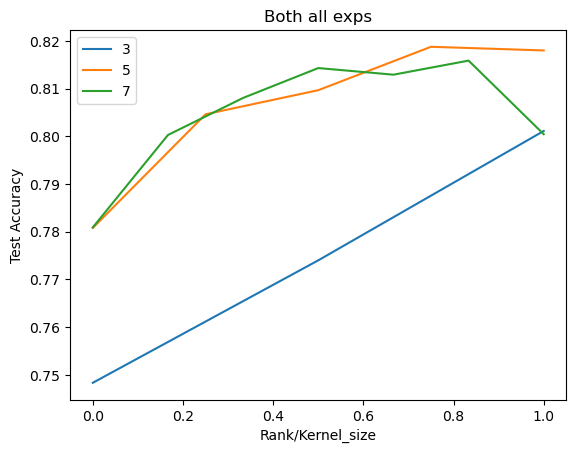

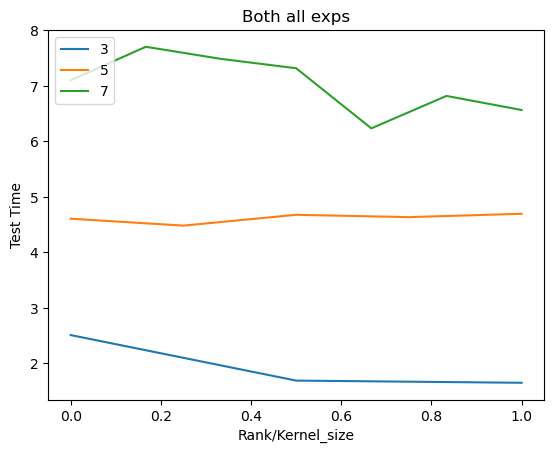

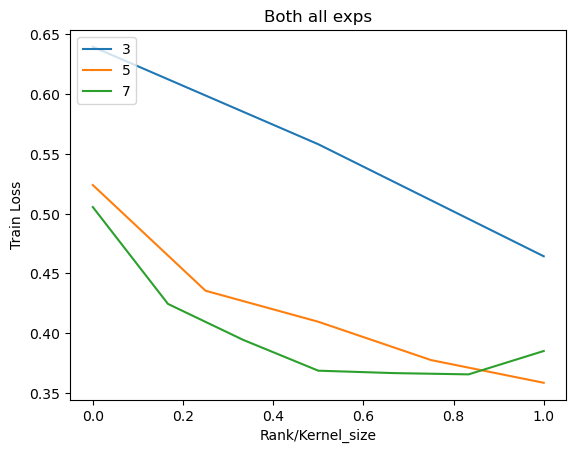

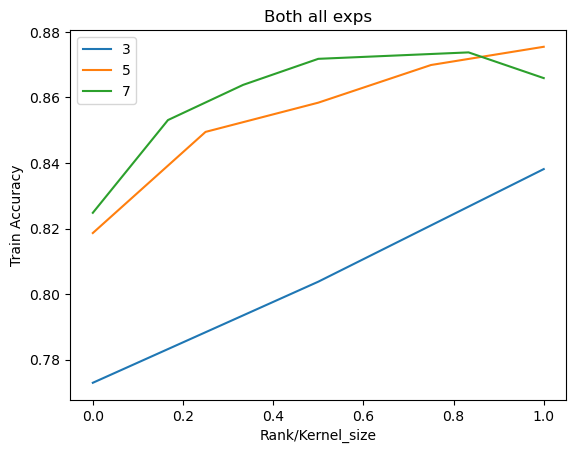

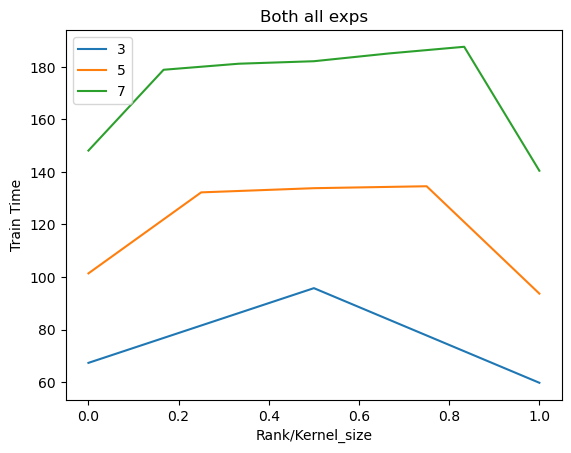

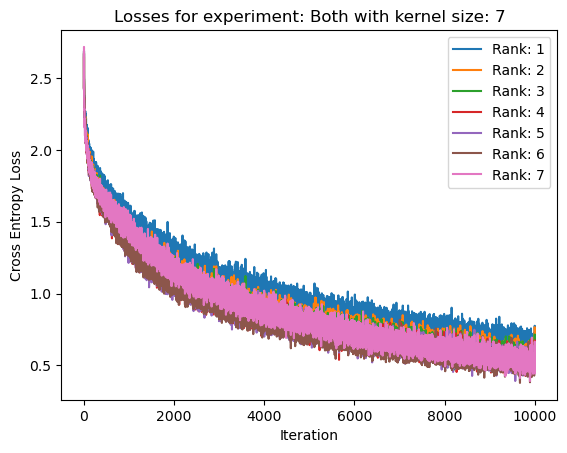

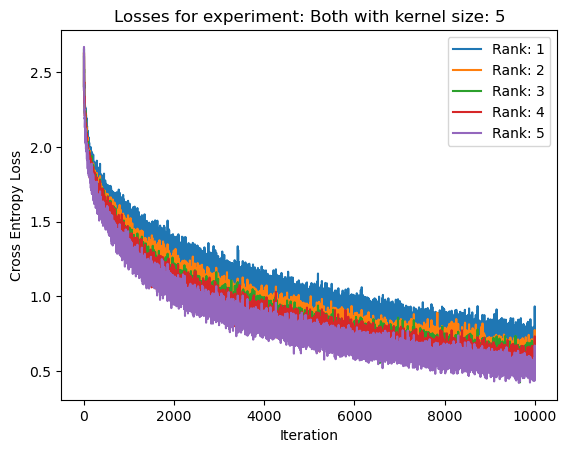

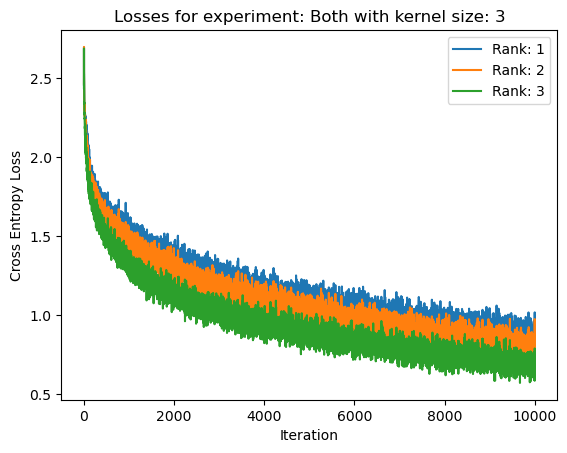

<Figure size 640x480 with 0 Axes>

In [49]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


ex_keys = ["Test Loss", "Test Accuracy", "Test Time", "Train Loss", "Train Accuracy", "Train Time"]


def loss_plotter(data, title):
    plt.clf()
    plt.plot(np.arange(len(data)), data)
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Loss")
    plt.title(title)
    plt.show()
    plt.clf()

def ex_printer(ex_data):
    for i,x in enumerate(ex_data):
        print(ex_keys[i] + ":", x)

def analyze_exp(pre, size, rank, verboseEx = False, verboseLoss = False):
    path = "Results" + str(pre) + "/" + str(size) + "_" + str(rank)
    full_losses = np.loadtxt(path + "/full_losses.txt")
    full_ex_data = np.loadtxt(path + "/full_ex_data.txt")
    mean_losses = np.mean(full_losses, axis = 0)
    mean_ex_data = np.mean(full_ex_data, axis = 0)
        
    
    if verboseLoss:
        loss_plotter(mean_losses, "Kernel Size: " + str(size) + ", Rank: " + str(rank))
    if verboseEx:
        ex_printer(mean_ex_data)
    return mean_losses, mean_ex_data

def analyze_full(pre, size, verboseGraph = False, verboseText = False):
    path = "Results" + str(pre) + "/" + str(size) + "_"
    hold_ex = np.zeros((size, 6))
    hold_losses = [None for _ in range(size)]
    for rank in range(1,size + 1):
        hold_losses[rank - 1], hold_ex[rank - 1] = analyze_exp(pre, size, rank)
        
    for i,x in enumerate(ex_keys):
        data = hold_ex[:,i]
        if verboseGraph:
            plt.clf()
            plt.title(pre + " with Kernel Size: " + str(size))
            plt.xlabel("Rank")
            plt.ylabel(x)
            plt.plot(np.arange(len(data)), data)
            plt.show()
            plt.clf()
            
    if verboseText:
        for i in range(size):
            analyze_exp(pre, size, i + 1, True)
            print()
    return hold_losses, hold_ex

def analyze_entire(pre, sizes):
    hold_losses = [None for _ in sizes]
    hold_ex = [None for _ in sizes]
    for i,size in enumerate(sizes):
        hold_losses[i],hold_ex[i] = analyze_full(pre, size)

    for i,x in enumerate(ex_keys):
        plt.clf()
        plt.title(pre + " all exps")
        plt.xlabel("Rank/Kernel_size")
        plt.ylabel(x)
        
        for j,size in enumerate(sizes):
            data = hold_ex[j][:,i]
            x_axis = np.arange(len(data))/(len(data) - 1)
            plt.plot(x_axis, data, label = str(size))

        plt.legend(loc = "upper left")
        plt.show()
        plt.clf()

def analyze_loss_graph(pre, size):
    hold_losses = [None for _ in range(size)]
    for rank in range(1,size + 1):
        hold_losses[rank - 1], _ = analyze_exp(pre, size, rank)
    plt.clf()
    plt.title("Losses for experiment: " + str(pre) + " with kernel size: " + str(size))
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Loss")

    for i,x in enumerate(hold_losses):
        plt.plot(np.arange(len(x)), x, label = "Rank: " + str(i + 1))
    plt.legend(loc = "upper right")
    plt.show()
    plt.clf()

analyze_exp("Base", 5, 1, True)
print()
analyze_exp("BatchNorm", 5, 1, True)
print()
analyze_exp("Dropout", 5, 1, True)
print()
analyze_exp("Both", 5, 1, True)
print()
            
analyze_entire("Both", [3,5,7])

analyze_full("Both", 7)
analyze_loss_graph("Both", 7)
analyze_loss_graph("Both", 5)
analyze_loss_graph("Both", 3)